https://steadyman.tistory.com/10,   
https://techblog-history-younghunjo1.tistory.com/114   
참고해 만듬

# 1. Data Load

In [9]:
from bs4 import BeautifulSoup  
import pandas as pd
from tqdm import tqdm_notebook
import nltk
import re
from urllib.request import urlopen

domain='https://movie.naver.com'
story=[]
title=[]
genre=[]
for i in tqdm_notebook(range (1,11)):
    
    url="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20191201&page="+str(i)
    html = urlopen(url)
    soup = BeautifulSoup(html,"html.parser")
    titles=soup.find_all('div',class_='tit5')
    hype=[]
    href=[]
  
    try:
        
        for each in titles:
           
                hype=each.find_all('a')
                for link in hype:
                    href.append(link['href'])
        for j in tqdm_notebook(range(len(href))):
                domain='https://movie.naver.com'
                domain=domain+href[j]
                html=urlopen(domain)
                soup=BeautifulSoup(html,"html.parser")
                story.append(soup.find('p',class_="con_tx").get_text())
            
                title_tag=soup.find('h3',class_='h_movie')
                title.append(title_tag.find('a').get_text())
            
                genre_tag=soup.find('p')
                genre.append(genre_tag.find('a').get_text())
    except:
        pass


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

# 2. Preprocessing

In [10]:
#스토리 정규화 처리
import re

for i in tqdm_notebook(range(len(story))):

    story[i] = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》“”’]','',story[i] )
    story[i] = re.sub('\r\xa0','',story[i] )


print(title[0])

Nmovie=pd.DataFrame(data={'제목':title,'줄거리':story,'장르':genre})

print(Nmovie.head())

Nmovie['합침'] = (Nmovie['제목']) + Nmovie['줄거리'] + (Nmovie['장르'])
print(Nmovie['합침'][0])

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/388 [00:00<?, ?it/s]

그린 북
        제목                                                줄거리     장르
0     그린 북  1962년 미국 입담과 주먹만 믿고 살아가던 토니 발레롱가비고 모텐슨는 교양과 우아...    드라마
1     가버나움  나를 세상에 태어나게 한 부모님을 고소하고 싶어요출생기록조차 없이 살아온 어쩌면 1...    드라마
2  베일리 어게인  귀여운 소년 이든의 단짝 반려견 베일리는 행복한 생을 마감한다하지만 눈을 떠보니 다...     모험
3      아일라  1950년 한국전쟁에 파병된 슐레이만은 칠흑 같은 어둠 속 홀로 남겨진 5살 소녀를...    드라마
4      주전장  일본의 인종차별 문제를 다룬 영상을 올린 후 우익들의 공격 대상이 된 일본계 미국인...  다큐멘터리
그린 북1962년 미국 입담과 주먹만 믿고 살아가던 토니 발레롱가비고 모텐슨는 교양과 우아함 그 자체인천재 피아니스트 돈 셜리마허샬라 알리 박사의 운전기사 면접을 보게 된다백악관에도 초청되는 등 미국 전역에서 콘서트 요청을 받으며 명성을 떨치고 있는 돈 셜리는위험하기로 소문난 미국 남부 투어 공연을 떠나기로 결심하고투어 기간 동안 자신의 보디가드 겸 운전기사로 토니를 고용한다거친 인생을 살아온 토니 발레롱가와 교양과 기품을 지키며 살아온 돈 셜리 박사생각 행동 말투 취향까지 달라도 너무 다른 두 사람은그들을 위한 여행안내서 그린북에 의존해 특별한 남부 투어를 시작하는데드라마


# 3. TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
Nmovie['합침'] = Nmovie['합침'].fillna('')

print(Nmovie)

tfidf_matrix = tfidf.fit_transform(Nmovie["줄거리"])
# overview에 대해서 tf-idf 수행
print(tfidf_matrix.shape)

               제목                                                줄거리     장르  \
0            그린 북  1962년 미국 입담과 주먹만 믿고 살아가던 토니 발레롱가비고 모텐슨는 교양과 우아...    드라마   
1            가버나움  나를 세상에 태어나게 한 부모님을 고소하고 싶어요출생기록조차 없이 살아온 어쩌면 1...    드라마   
2         베일리 어게인  귀여운 소년 이든의 단짝 반려견 베일리는 행복한 생을 마감한다하지만 눈을 떠보니 다...     모험   
3             아일라  1950년 한국전쟁에 파병된 슐레이만은 칠흑 같은 어둠 속 홀로 남겨진 5살 소녀를...    드라마   
4             주전장  일본의 인종차별 문제를 다룬 영상을 올린 후 우익들의 공격 대상이 된 일본계 미국인...  다큐멘터리   
..            ...                                                ...    ...   
383         산이 울다  1984년 중국의 산골마을 마을 청년 한총Han Chong이 오소리를 잡기 위해 설...    드라마   
384  하이큐!! 승자와 패자  카라스노 고교의 스파이커 히나타와  천재 세터 카게야마는 입부 후 첫 전국 대회인 ...  애니메이션   
385           베테랑  한 번 꽂힌 것은 무조건 끝을 보는 행동파 서도철황정민 20년 경력의 승부사 오팀장...     액션   
386         고양이 춤  길고양이 파파라치가 된 두 남자의 수줍은 고백어느 날 고양이가 우리 마음속으로 들어...  다큐멘터리   
387        끝까지 간다  어머니의 장례식 날 급한 연락을 받고 경찰서로 향하던 형사 고건수이선균  아내의 이...     범죄   

                                                   

# 4. 코사인 유사도

In [27]:
#코사인유사도
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

indices = pd.Series(Nmovie.index, index=Nmovie['제목']).drop_duplicates()
print(indices.head())
#영화의 타이틀과 인덱스를 가진 테이블을 만듬
#영화 타이틀을 입력하면 인덱스를 리턴하려고 만듬

[[1.         0.04854067 0.00609351 ... 0.         0.00655382 0.        ]
 [0.04854067 1.         0.01816876 ... 0.00909911 0.         0.        ]
 [0.00609351 0.01816876 1.         ... 0.         0.01725421 0.        ]
 ...
 [0.         0.00909911 0.         ... 1.         0.01215917 0.02129291]
 [0.00655382 0.         0.01725421 ... 0.01215917 1.         0.        ]
 [0.         0.         0.         ... 0.02129291 0.         1.        ]]
제목
그린 북       0
가버나움       1
베일리 어게인    2
아일라        3
주전장        4
dtype: int64


# 5. Predict (추천)

In [12]:
def get_recomm(title, cosine_sim=cosine_sim):
    choice = []
    # 선택한 영화의 타이틀로부터 해당되는 인덱스를 받아옵니다. 이제 선택한 영화를 가지고 연산할 수 있습니다.
    idx = indices[title]

    # 모든 영화에 대해서 해당 영화와의 유사도를 구합니다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬합니다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아옵니다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 받아옵니다.
    movie_indices = [i[0] for i in sim_scores]
    
    for i in range(10):
        choice.append(Nmovie['제목'][movie_indices[i]])
    # 가장 유사한 10개의 영화의 제목을 리턴합니다.
    print('***영화 추천 순위***')
    for i in range(10):
        print(str(i+1) + '순위 : ' + choice[i])

get_recomm('토이 스토리')

***영화 추천 순위***
1순위 : 토이 스토리 2
2순위 : 벅스 라이프
3순위 : 어네스트와 셀레스틴
4순위 : 모노노케 히메
5순위 : 가타카
6순위 : 사랑은 비를 타고
7순위 : 미쓰백
8순위 : 토이 스토리 4
9순위 : 캐스트 어웨이
10순위 : 언더독


# 6. Clustering (K- Means)

In [18]:
# K-means로 3개 군집으로 문서 군집화시키기
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=10000, random_state=42)
# 비지도 학습이니 feature로만 학습시키고 예측
cluster_label = kmeans.fit_predict(tfidf_matrix)

# 군집화한 레이블값들을 document_df 에 추가하기
Nmovie['cluster_label'] = cluster_label
print(Nmovie.sort_values(by=['cluster_label']))

                   제목                                                줄거리  \
0                그린 북  1962년 미국 입담과 주먹만 믿고 살아가던 토니 발레롱가비고 모텐슨는 교양과 우아...   
245            저수지 게임  탐사보도 전문 악마 기자 주진우가 누구나 알지만 아무도 말 못하는 그분의 검은 돈을...   
246            어바웃 타임  모태솔로 팀돔놀 글리슨은 성인이 된 날 아버지빌 나이로부터 놀랄만한 가문의 비밀을 ...   
101   뽀로로 극장판 보물섬 대모험  전설 속 보물을 찾아 떠난 뽀로로와 친구들은 우연히 손에 넣은 지도를 따라 신비의 ...   
252  뚜르: 내 생애 최고의 49일  스물여섯 윤혁은 희귀암 말기 판정을 받지만 운명처럼 찾아온 자전거로 새로운 희망을 ...   
..                ...                                                ...   
98            내 이름은 칸  자폐증을 가지고 있지만 천재적인 지적 능력과 어머니로부터 얻게 된 세상을 바라보는 ...   
257    브링 더 소울 : 더 무비  서울을 시작으로 북미와 유럽까지 LOVE YOURSELF 투어를 마친 방탄소년단 전...   
95            폴리스 스토리  홍콩 경찰청의 특수기동대 소속 진가구 순경성룡은 낙천적인 성격과 뛰어난 능력으로 모...   
267              국가대표  1996년 전라북도 무주 동계올림픽 유치를 위해 정식 종목 중 하나인 스키점프 국가...   
387            끝까지 간다  어머니의 장례식 날 급한 연락을 받고 경찰서로 향하던 형사 고건수이선균  아내의 이...   

         장르                                                 합침  cluster_label  
0      

In [19]:
cluster_centers = kmeans.cluster_centers_
print(cluster_centers.shape)
print(cluster_centers)

(3, 22042)
[[0.         0.         0.00210045 ... 0.         0.         0.        ]
 [0.00039288 0.00056742 0.         ... 0.         0.00040816 0.00041116]
 [0.         0.         0.         ... 0.00076819 0.         0.        ]]


In [55]:
def get_cluster_details(cluster_model, cluster_data, feature_names,
                       cluster_num, top_n_features=10):
    cluster_details = {}
    # 각 클러스터 레이블별 feature들의 center값들 내림차순으로 정렬 후의 인덱스를 반환
    center_feature_idx = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    # 개별 클러스터 레이블별로 
    for cluster_num in range(cluster_num):
        # 개별 클러스터별 정보를 담을 empty dict할당
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # 각 feature별 center값들 정렬한 인덱스 중 상위 10개만 추출
        top_ftr_idx = center_feature_idx[cluster_num, :top_n_features]
        top_ftr = [feature_names[idx] for idx in top_ftr_idx]
        # top_ftr_idx를 활용해서 상위 10개 feature들의 center값들 반환
        # 반환하게 되면 array이기 떄문에 리스트로바꾸기
        top_ftr_val = cluster_model.cluster_centers_[cluster_num, top_ftr_idx].tolist()
        
        # top_feature를 정확히 하고싶으면 TfidfVectorizer생성시 tokenizer 세팅하기
        # cluster_details 딕셔너리에다가 개별 군집 정보 넣어주기
        cluster_details[cluster_num]['top_features'] = top_ftr
        cluster_details[cluster_num]['top_featrues_value'] = top_ftr_val
        
        # 해당 cluster_num으로 분류된 파일명(문서들) 넣어주기
        titles = cluster_data[cluster_data['cluster_label']==cluster_num]['제목']
        # filenames가 df으로 반환되기 떄문에 값들만 출력해서 array->list로 변환
        titles = titles.values.tolist()
        cluster_details[cluster_num]['titles'] = titles
    
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(f"#####Cluster Num: {cluster_num}")
        print()
        print("상위 10개 feature단어들:\n", cluster_detail['top_features'])
        print()
        print(f"Cluster {cluster_num}으로 분류된 문서들:\n{cluster_detail['titles'][:5]}")
        print('-'*20)

feature_names = tfidf.get_feature_names()
cluster_details = get_cluster_details(cluster_model=kmeans,
                                     cluster_data=Nmovie,
                                     feature_names=feature_names,
                                     cluster_num=3,
                                     top_n_features=10)
print_cluster_details(cluster_details)

#####Cluster Num: 0

상위 10개 feature단어들:
 ['최고의', '된다', '하지만', '위해', '위한', '있는', '악의', '그의', '그리고', '그러나']

Cluster 0으로 분류된 문서들:
['그린 북', '쇼생크 탈출', '위대한 쇼맨', '헌터 킬러', '반지의 제왕: 왕의 귀환']
--------------------
#####Cluster Num: 1

상위 10개 feature단어들:
 ['된다', '것을', '위해', '자신의', '있는', '모든', '없는', '알게', '그러나', '하지만']

Cluster 1으로 분류된 문서들:
['베일리 어게인', '아일라', '주전장', '원더', '당갈']
--------------------
#####Cluster Num: 2

상위 10개 feature단어들:
 ['위해', '함께', '그는', '없는', '어느', '된다', '시작된다', '있는', '다시', '자신의']

Cluster 2으로 분류된 문서들:
['가버나움', '보헤미안 랩소디', '월-E', '포레스트 검프', '글래디에이터']
--------------------


# 7. 특정 영화와 같은 클러스터링에 있는 군집 비교

In [43]:
# 클러스터링된 문서들 중에서 특정 문서를 하나 선택한 후 비슷한 문서 추출
# 코사인 유사도 새로구함 
from sklearn.metrics.pairwise import cosine_similarity

movie_idx = Nmovie[Nmovie['cluster_label']==1].index
print("1 로 클러스터링된 문서들의 인덱스:\n",movie_idx)
print()
# 호텔 카테고리로 클러스터링 된 문서들의 인덱스 중 하나 선택해 비교 기준으로 삼을 문서 선정
comparison_doc = Nmovie.iloc[movie_idx[0]]['제목']
print("##유사도 비교 기준 문서 이름:",comparison_doc,'##')
print()

# 위에서 추출한 특정 카테고리(클러스터링된거)로 클러스터링된 문서들의 인덱스 중 0번인덱스(비교기준문서)제외한
# 다른 문서들과의 유사도 측정
similarity = cosine_similarity(tfidf_matrix[movie_idx[0]], tfidf_matrix[movie_idx])
print(similarity)

1 로 클러스터링된 문서들의 인덱스:
 Int64Index([  2,   3,   4,   5,   6,   8,  10,  12,  13,  14,
            ...
            359, 360, 361, 364, 369, 375, 376, 383, 384, 386],
           dtype='int64', length=187)

##유사도 비교 기준 문서 이름: 베일리 어게인 ##

[[1.         0.         0.         0.00864291 0.         0.00935801
  0.         0.00850445 0.01448699 0.         0.00194603 0.00920832
  0.00487169 0.00159218 0.00937725 0.00942193 0.         0.05838273
  0.         0.00988523 0.         0.00445954 0.         0.
  0.00907053 0.00553662 0.00988536 0.00985816 0.         0.01440775
  0.         0.         0.         0.01522617 0.         0.00829351
  0.00638758 0.00607124 0.00568709 0.0115849  0.0155825  0.00553965
  0.00458448 0.00515656 0.         0.0016444  0.01961943 0.00656942
  0.01836528 0.00739327 0.00695954 0.00343601 0.00588154 0.01234119
  0.         0.         0.00547064 0.00829484 0.00946693 0.00779247
  0.         0.01000962 0.01840864 0.01121798 0.         0.0054875
  0.         0.         0.  

Int64Index([ 26, 298, 168, 275,  87, 166, 203, 116,  91, 223,
            ...
            100, 218, 292, 290, 114, 124, 130, 131, 135, 294],
           dtype='int64', length=186)
[0.05838273 0.02560826 0.02349917 0.0223625  0.01961943 0.01906942
 0.01901949 0.01840864 0.01836528 0.01784705 0.01725421 0.01684533
 0.0155825  0.01522617 0.01484243 0.01465096 0.01455612 0.01448699
 0.01441966 0.01440775 0.01410074 0.01396142 0.01321206 0.01314542
 0.01255628 0.01234119 0.01208247 0.01203857 0.01165895 0.0115849
 0.01121798 0.01072166 0.01054471 0.01047156 0.01040108 0.01000962
 0.00988536 0.00988523 0.00985816 0.00980612 0.0097703  0.00946693
 0.00942193 0.00937725 0.00935801 0.00930094 0.00920832 0.00914742
 0.00907053 0.00902799 0.00899709 0.00864291 0.00850445 0.00830648
 0.00829484 0.00829351 0.00811262 0.00803706 0.00785765 0.0078517
 0.00779751 0.00779247 0.00739327 0.00709014 0.0070771  0.00704546
 0.00698668 0.00695954 0.00693162 0.00691467 0.00661295 0.00656942
 0.00638758 0.00637

Text(0.5, 1.0, '베일리 어게인')

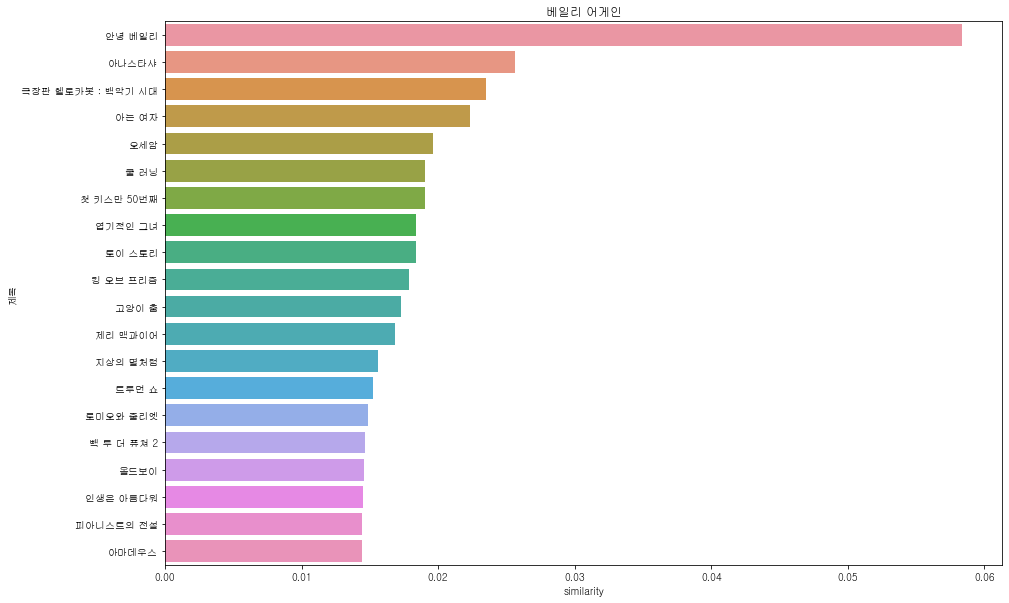

In [48]:
# 비교기준 문서와 다른 문서들간의 유사도 살펴보기
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# array 내림차순으로 정렬한 후 인덱스 반환 [:,::-1] 모든행에 대해서 열을 내림차순으로!
sorted_idx = similarity.argsort()[:,::-1]
# 비교문서 당사자는 제외한 인덱스 추출
sorted_idx = sorted_idx[:, 1:]

# 유사도가 큰 순으로 hotel_idx(label=1인 즉, 호텔과관련된 내용의 문서이름들의 index들)에서 재 정렬 
# index로 넣으려면 1차원으로 reshape해주기!
movie_sorted_idx = movie_idx[sorted_idx.reshape(-1,)]
# 유사도 행렬값들을 유사도가 큰 순으로 재정렬(비교 문서 당사자는 제외)
movie_sim_values = np.sort(similarity.reshape(-1,))[::-1]
movie_sim_values = movie_sim_values[1:]
# 이렇게 되면 비교문서와 가장 유사한 순으로 '해당문서의index-유사도값' 으로 동일한 위치가 매핑된 두 개의 array!
# 그래서 그대로 데이터프레임의 각 칼럼으로 넣어주기
print(movie_sorted_idx)
print(movie_sim_values)
print()
print("길이 비교", len(movie_sorted_idx), len(movie_sim_values))
print()

# 빈 데이터프레임 생성
movie_sim_df = pd.DataFrame()
# hotel_sorted_idx 와 hotel_sim_values 매핑시킨 array임
# 전체 조회하기에는 그래프가 깨져서 20개로 제한 둠
movie_sim_df['제목'] = Nmovie.iloc[movie_sorted_idx]['제목'][:20]
movie_sim_df['similarity'] = movie_sim_values[:20]

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.figure(figsize=(15,10))
sns.barplot(data=movie_sim_df, x='similarity', y='제목')
plt.title(comparison_doc)

# 8. 클러스터링 시각화

In [51]:
# sns.scatterplot(x="줄거리", y="제목", hue="cluster_label", data=Nmovie, palette="Set2");

Error in callback <function flush_figures at 0x0000027FB7568F78> (for post_execute):


KeyboardInterrupt: 